#**Used Car_Price Prediction Project using Machine Iearning**

# Collection_Data

In [253]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [254]:
used_car_data = pd.read_csv("used-car-dataset.csv")
used_car_data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


# Preprossing_Data

In [255]:
used_car_data.shape

(6019, 14)

In [256]:
used_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [257]:
used_car_data['Mileage'] = used_car_data['Mileage'].apply(lambda x: float(str(x).split()[0]) if pd.notnull(x) else x)
used_car_data['Engine'] = used_car_data['Engine'].apply(lambda x: float(str(x).split()[0]) if pd.notnull(x) else x)
used_car_data['Power'] = used_car_data['Power'].str.extract(r'(\d+\.?\d*)').astype(float)

In [258]:
used_car_data['Mileage'] = used_car_data['Mileage'].fillna(used_car_data['Mileage'].median())
used_car_data['Power'] = used_car_data['Power'].fillna(pd.NA)
used_car_data['Power'] = used_car_data['Power'].fillna(used_car_data['Power'].median())
used_car_data['Engine'] = used_car_data['Engine'].fillna(used_car_data['Engine'].median())
used_car_data['Seats'] = used_car_data['Seats'].fillna(used_car_data['Seats'].mode()[0])
used_car_data = used_car_data.drop(columns=['Unnamed: 0', 'New_Price'])

In [259]:
used_car_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [260]:
used_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [261]:
label_encoder = LabelEncoder()
used_car_data['Fuel_Type'] = label_encoder.fit_transform(used_car_data['Fuel_Type'])
used_car_data['Transmission'] = label_encoder.fit_transform(used_car_data['Transmission'])
used_car_data['Owner_Type'] = label_encoder.fit_transform(used_car_data['Owner_Type'])

In [262]:
used_car_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,4,1,0,18.90,998.0,67.10,5.0,2.65


In [263]:
used_car_data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [264]:
used_car_data.duplicated().sum()

0

In [265]:
used_car_data.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,2.363017,0.714238,0.379465,18.134966,1620.509221,112.883539,5.276790,9.479468
std,3.269742,9.126884e+04,1.504939,0.451814,0.818458,4.581528,599.635458,53.283701,0.806346,11.187917
min,1998.000000,1.710000e+02,0.000000,0.000000,0.000000,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,1.000000,0.000000,0.000000,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1.000000,1.000000,0.000000,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,4.000000,1.000000,0.000000,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,4.000000,1.000000,3.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [266]:
import plotly.express as px

name_columns = used_car_data.columns
for i in name_columns:
  fig=px.box(used_car_data,x=i)
  fig.show()

## Spliting_Data

In [267]:
X = used_car_data[['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]
y = used_car_data['Price']

In [268]:
X

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0
3,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,2013,40670,1,0,2,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...
6014,2014,27365,1,1,0,28.40,1248.0,74.00,5.0
6015,2015,100000,1,1,0,24.40,1120.0,71.00,5.0
6016,2012,55000,1,1,2,14.00,2498.0,112.00,8.0
6017,2013,46000,4,1,0,18.90,998.0,67.10,5.0


In [269]:
y

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74
...,...
6014,4.75
6015,4.00
6016,2.90
6017,2.65


In [270]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_model = scaler_X.fit_transform(X)
# Reshape y to a 2D array with a single column
y_model = scaler_y.fit_transform(y.values.reshape(-1, 1))

# EDA

Text(0, 0.5, 'Frequency')

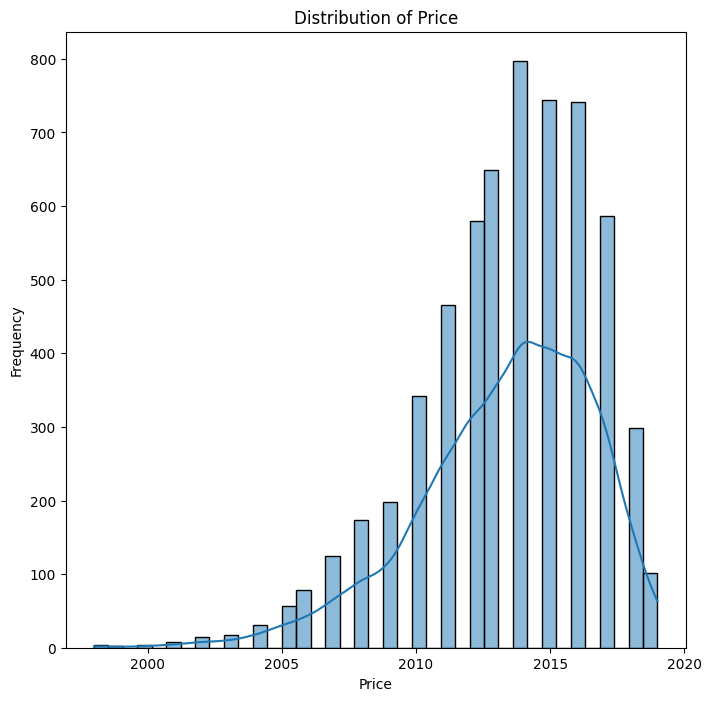

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.histplot(X['Year'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

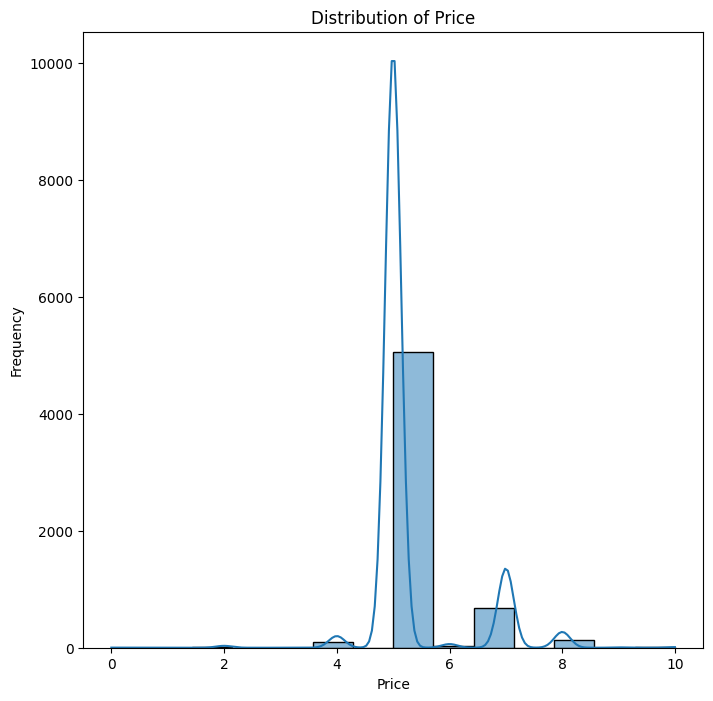

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.histplot(X['Seats'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

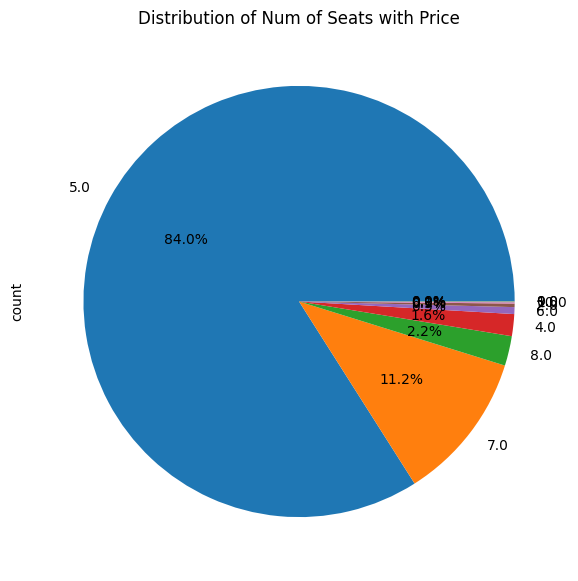

In [273]:
figsize = (7, 7)
plt.figure(figsize=figsize)
plt.title('Distribution of Num of Seats with Price')
X['Seats'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
plt.show()


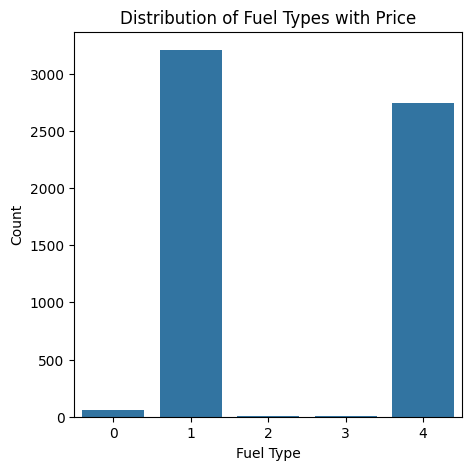

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x='Fuel_Type', data=used_car_data)
plt.title('Distribution of Fuel Types with Price')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Price')

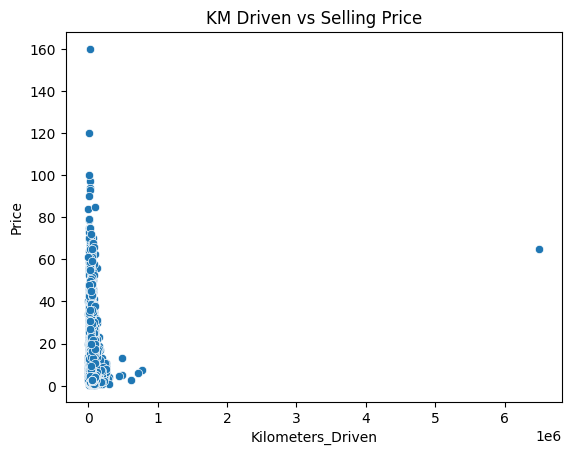

In [275]:
sns.scatterplot(x='Kilometers_Driven', y='Price', data=used_car_data)
plt.title('KM Driven vs Selling Price')
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price')

Text(0, 0.5, 'Frequency')

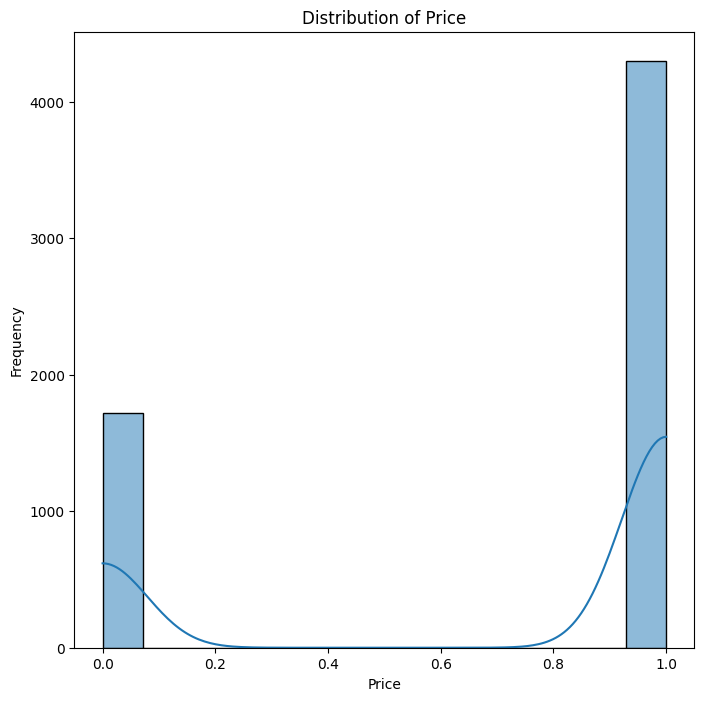

In [276]:
plt.figure(figsize=(8, 8))
sns.histplot(X['Transmission'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

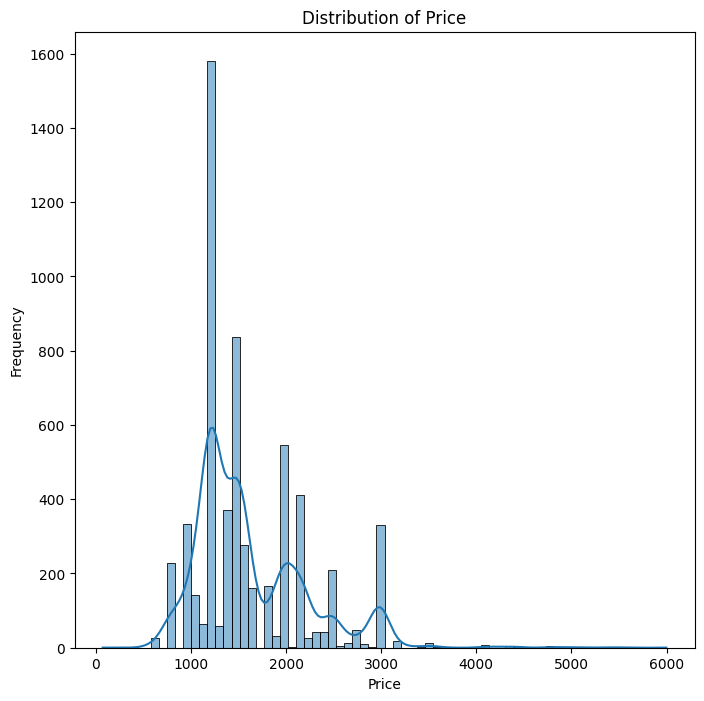

In [277]:
plt.figure(figsize=(8, 8))
sns.histplot(X['Engine'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

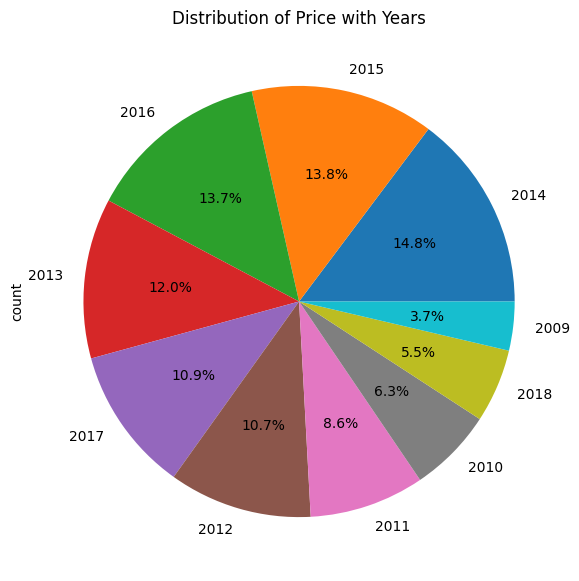

In [278]:
figsize = (7, 7)
plt.figure(figsize=figsize)
plt.title('Distribution of Price with Years')
X['Year'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
plt.show()

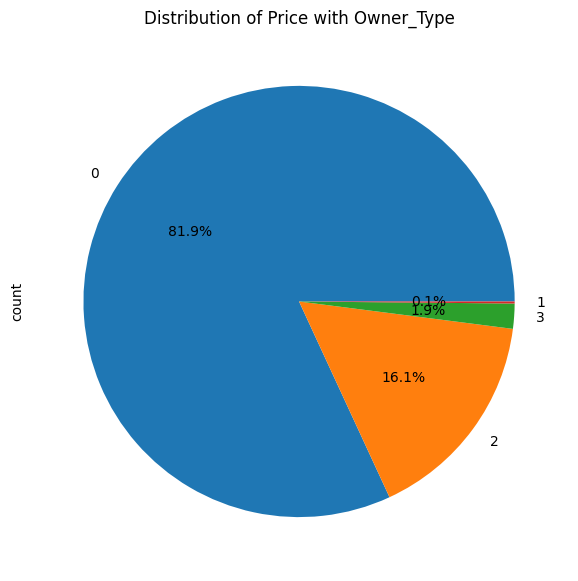

In [279]:
figsize = (7, 7)
plt.figure(figsize=figsize)
plt.title('Distribution of Price with Owner_Type')
X['Owner_Type'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
plt.show()


Normalization_Data

In [280]:
def normalize(used_car_data, train_split):
    data_mean = used_car_data[:train_split].mean(axis=0)
    data_std = used_car_data[:train_split].std(axis=0)
    return (used_car_data - data_mean) / data_std

In [281]:
split_fraction = 0.8
train_split = int(split_fraction * int(used_car_data.shape[0]))
print("Train split: ", train_split)

Train split:  4815


In [282]:
X = normalize(X.values, train_split)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8
0,-1.030116,0.127318,-1.570829,0.639633,-0.460944,1.870151,-1.050693,-1.044595,-0.345765
1,0.510547,-0.180778,-0.906545,0.639633,-0.460944,0.349131,-0.066483,0.251778,-0.345765
2,-0.721984,-0.131085,1.086308,0.639633,-0.460944,0.026491,-0.711949,-0.462713,-0.345765
3,-0.413851,0.276396,-0.906545,0.639633,-0.460944,0.590563,-0.629370,-0.461570,2.124351
4,-0.105719,-0.184057,-0.906545,-1.563396,1.990129,-0.631960,0.584039,0.529954,-0.345765


In [283]:
train_data = X.loc[0 : train_split - 1]
val_data = X.loc[train_split:]

print("Train data shape: ", train_data.shape)
print("Validation data shape: ", val_data.shape)

Train data shape:  (4815, 9)
Validation data shape:  (1204, 9)


## Split **Data**

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics

# Assuming X and y are defined

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val) # Scale validation data
X_test_scaled = scaler.transform(X_test)

# Build Models

# DecisionTree

In [287]:
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

DT = DecisionTreeRegressor() # Initialize DecisionTreeRegressor
DT.fit(X_train, y_train) # Fit the model

DecisionTreeRegressor()

In [288]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = DT.predict(X_train)  # Assuming DT is your trained model
y_test_pred = DT.predict(X_test)
y_val_pred = DT.predict(X_val)


print(f"Train Score: {r2_score(y_train, y_train_pred)}")
print(f"Test Score: {r2_score(y_test, y_test_pred)}")
print(f"Validation Score: {r2_score(y_val, y_val_pred)}")

Train Score: 0.9999238429229217
Test Score: 0.8195601517420156
Validation Score: 0.699116545489979


## Random Forest

In [289]:
# Import the necessary class for regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and train the Random Forest model
RF = RandomForestRegressor(random_state=42) # Initialize the model
RF.fit(X_train, y_train) # Fit the model to the training data



RandomForestRegressor(random_state=42)

In [290]:
# Now you can use the trained model for predictions
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
y_val_pred = RF.predict(X_val)

# Evaluate and print the scores
print(f"Train Score: {r2_score(y_train, y_train_pred)}")
print(f"Test Score: {r2_score(y_test, y_test_pred)}")
print(f"Validation Score: {r2_score(y_val, y_val_pred)}")

Train Score: 0.9833964597136384
Test Score: 0.8957368640627511
Validation Score: 0.8322568202695992


## xgboost

In [291]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBRegressor

In [298]:
model1 = XGBRegressor()

In [299]:
# Fit the model using the numerical features from TF-IDF and corresponding training targets
model1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [300]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)
y_val_pred = model1.predict(X_val)

# Evaluate and print the scores
print(f"Train Score: {r2_score(y_train, y_train_pred)}")
print(f"Test Score: {r2_score(y_test, y_test_pred)}")
print(f"Validation Score: {r2_score(y_val, y_val_pred)}")

Train Score: 0.9941421901069799
Test Score: 0.8995735084069825
Validation Score: 0.8303760676888694
